Reading in ADP data

In [1]:
import pandas as pd

# Reading in pff_receiving data

fantasy_adp_15_16 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_15-16.csv')
fantasy_adp_16_17 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_16-17.csv')
fantasy_adp_17_18 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_17-18.csv')
fantasy_adp_18_19 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_18-19.csv')
fantasy_adp_19_20 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_19-20.csv')
fantasy_adp_20_21 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_20-21.csv')
fantasy_adp_21_22 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_21-22.csv')
fantasy_adp_22_23 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_22-23.csv')
fantasy_adp_23_24 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_23-24.csv')
fantasy_adp_24_25 = pd.read_csv('../fantasy_data/fantasy_adp/fantasy_adp_24-25.csv')

# Creating a season column to differentiate between seasons

fantasy_adp_15_16['Season'] = '2015-16'
fantasy_adp_16_17['Season'] = '2016-17'
fantasy_adp_17_18['Season'] = '2017-18'
fantasy_adp_18_19['Season'] = '2018-19'
fantasy_adp_19_20['Season'] = '2019-20'
fantasy_adp_20_21['Season'] = '2020-21'
fantasy_adp_21_22['Season'] = '2021-22'
fantasy_adp_22_23['Season'] = '2022-23'
fantasy_adp_23_24['Season'] = '2023-24'
fantasy_adp_24_25['Season'] = '2024-25'

fantasy_adp_15_16['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_16_17['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_17_18['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_18_19['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_19_20['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_20_21['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_21_22['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_22_23['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_23_24['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)
fantasy_adp_24_25['position'] = fantasy_adp_24_25['POS'].str.slice(0,2)

# Combining all of the different season's data into one fantasy_adp dataset

fantasy_adp = pd.concat([fantasy_adp_15_16, fantasy_adp_16_17, fantasy_adp_17_18, fantasy_adp_18_19, fantasy_adp_19_20, fantasy_adp_20_21, fantasy_adp_21_22, fantasy_adp_22_23, fantasy_adp_23_24, fantasy_adp_24_25])




Setting Draft Settings

Naive draft pick strategy

Draft Analysis
ADP of drafted player order:



In [2]:
import random
NUM_TEAMS = 10
ROSTER_SLOTS = {
    "QB": 1,
    "RB": 2,
    "WR": 2,
    "TE": 1,
    "FLEX": 2,  # RB/WR/TE
    "Bench": 6
}
TOTAL_ROUNDS = sum(ROSTER_SLOTS.values())

class Player:
    def __init__(self, player_row, round_taken, pick_position, projected_ppg=None):
        self.name = player_row['Player']
        self.position = player_row['position']
        self.team = player_row['Team']
        self.round_taken = round_taken
        self.pick_position = pick_position,
        self.adp = player_row['Sleeper']
        #self.pick_number = (round_taken - 1) * NUM_TEAMS + ((round_taken + 1) % 2) * pick_position + (round_taken % 2) * (NUM_TEAMS - pick_position) DON'T THINK PLAYER NEEDS THIS
        #self.projected_ppg = projected_ppg # Need to decide if I need to include this here or not

    def __repr__(self):
        return f"{self.name} ({self.position}) - ADP: {self.adp}"

class Team:
    def __init__(self, draft_position):
        self.roster = {"QB": [], "RB": [], "WR": [], "TE": [], "FLEX": [], "Bench": []}
        self.draft_position = draft_position


class Draft:
    def __init__(self, num_teams, roster_slots, fantasy_adp):
        # Instance attributes
        self.teams = {i: Team(i) for i in range(1, num_teams + 1)}
        self.current_round = 1
        self.current_pick_position = 1
        self.num_teams = num_teams
        self.roster_slots = roster_slots
        self.total_rounds = sum(roster_slots.values())
        self.available_players = fantasy_adp.copy()
        self.pick_number = 1

    def advance_pick(self):
        if self.current_round % 2 == 1:
            # Odd round: left to right
            if self.current_pick_position >= self.num_teams:
                self.current_round += 1
            else:
                self.current_pick_position += 1
        else:
            # Even round: right to left
            if self.current_pick_position <= 1:
                self.current_round += 1
            else:
                self.current_pick_position -= 1
        self.pick_number += 1

        if self.current_round > self.total_rounds:
            raise StopIteration("Draft is complete.")
        

    def draft_player(self, player):
        if len(self.teams[self.current_pick_position].roster[player.position]) < self.roster_slots[player.position]:
            self.teams[self.current_pick_position].roster[player.position].append(player)
        elif player.position in ["RB", "WR", "TE"] and len(self.teams[self.current_pick_position].roster["FLEX"]) < self.roster_slots["FLEX"]:
            # Add to FLEX if possible
            self.teams[self.current_pick_position].roster["FLEX"].append(player)
        else:
            self.teams[self.current_pick_position].roster["Bench"].append(player)

        self.available_players = self.available_players[self.available_players['Player'] != player.name]

        print(f"Round {self.current_round}, Position {self.current_pick_position}, Team {self.current_pick_position} picked {player.name} ({player.position}) with ADP {player.adp}")


    def print_current_teams(self):
        for key, team in self.teams.items():
            print(f"Team {key} Roster:")
            for position, players in team.roster.items():
                if players:
                    print(f"  {position}: {[player.name for player in players]}")
            print()

        




Testing Draft class

In [46]:
import time
draft = Draft(10, ROSTER_SLOTS, fantasy_adp_24_25)


for i in range(60):
    rank = [0, 1, 2, 3, 4, 5]
    weights = [0.4, 0.3, 0.2, 0.1, 0.05, 0.05]
    chosen_rank = random.choices(rank, weights=weights, k=1)[0]
    player_choice = draft.available_players.iloc[chosen_rank]
    draft.draft_player(Player(player_choice, draft.current_round, draft.current_pick_position))
    draft.advance_pick()
    time.sleep(1)  # Adding a delay to simulate time between picks

draft.print_current_teams()

Round 1, Position 1, Team 1 picked Christian McCaffrey (RB) with ADP 1.0
Round 1, Position 2, Team 2 picked Tyreek Hill (WR) with ADP 2.0
Round 1, Position 3, Team 3 picked Bijan Robinson (RB) with ADP 6.0
Round 1, Position 4, Team 4 picked CeeDee Lamb (WR) with ADP 3.0
Round 1, Position 5, Team 5 picked Amon-Ra St. Brown (WR) with ADP 7.0


KeyboardInterrupt: 

Creating Agents

In [8]:
import random
from abc import ABC, abstractmethod
import numpy as np


    # Create list of top players at needed positions
    # Make more likely to choose players at needed positions. Still give a chance to choose RB's and WR's if they are still needed.
    # More likely to choose backup QB's and TE's if they didn't take one in the first 6ish rounds
    

def positional_needs(team, roster_slots):
    position_count = {"QB": len(team.roster["QB"]), "RB": len(team.roster["RB"]), "WR": len(team.roster["WR"]), "TE": len(team.roster["TE"])}
    return position_count


class Agent(ABC):
    def __init__(self, name, draft_position):
        self.name = name
        self.draft_position = draft_position

    @abstractmethod
    def pick_player(self, draft):
        """
        Decide which player to pick.
        Must be implemented by all subclasses.

        Parameters:
          - available_players: current pool of players to pick from
          - team: current Team object of the agent
          - roster_slots: draft roster configuration

        Returns:
          - Player object to pick
        """
        pass
    
    # Rules
    # Need to take ADP into account in the weight, rather than just based on the list of available players (especially early on)
    # QB and TE don't take 2 until after round 8
    # If you have a QB or TE that you took in the first 5 rounds, you are less likely to take another one.
    # The longer you go without taking a QB or TE, the more likely you are to take one.
    # RB's and WR's are always more incentivized to be taken than QB's and TE's
    # The later rounds have a larger list of potential players to choose from.
    # Do I want TE's to count as a FLEX option? Technically sure but almost never done.
    
    # Going to base my agent off of ADP, not pick difference. I will create a pick diff distribution
    # for the agent, and for the draft data, and will compare the two to see how well the agent is doing
    # and adjust the weights accordingly.

    # Round 1: Purely adp
    # Round 2: Mostly adp, but some positional weights (not based on roster needs, just general positional scarcity)
    # Round 3: Create positional pick diff distribution to see how to adjust positional weights
    



class NaiveAgent:
    def __init__(self, name):
        self.name = name
        # You can store persistent info if needed, e.g. draft_position, preferences, etc.

   
    def geometric_decay(self, x, p):
      weights = [(1-p)**i for i in range(x)]
      return np.array(weights) / sum(weights)
    
    def weight_calculator(self, player_num, p, beta, adp_list):
      geometric_decay_weights = self.geometric_decay(player_num, p)
      adp_list = np.array(adp_list)
      adp_factor = np.exp(-beta * adp_list)
      weights = geometric_decay_weights * adp_factor
      weights = weights / sum(weights)  # Normalize weights
      return weights


    def pick_player(self, draft):
        """
        Decide which player to pick based on:
          - available_players (e.g. a DataFrame or list of Player objects)
          - team (the Team object representing this agent's roster so far)
          - roster_slots (to know positional needs)
        Returns:
          - Player object to pick
        """
        available_players = draft.available_players
        team = draft.teams[draft.current_pick_position]
        roster_slots = draft.roster_slots
        round = draft.current_round
        team_position = draft.current_pick_position
        pick_number = draft.pick_number
        match round:
            case 1:
              return self.round_1_pick(available_players, team, roster_slots, round, team_position, pick_number)
            case 2:
              return self.round_2_pick(available_players, team, roster_slots, round, team_position, pick_number)
            case 3, 4:
                self.round_3_4_pick(available_players, team, roster_slots, round, team_position, pick_number)
        
    
    def round_1_pick(self, available_players, team, roster_slots, round, team_position, pick_number):
        if pick_number <= 2:
            players = available_players.head(4)
            weights = [0.75, 0.15, 0.05, 0.05]
            player_options = list(range(len(players)))
            chosen_index = random.choices(player_options, weights, k=1)[0]
            player = Player(players.iloc[chosen_index], round, team_position)
            return player
        elif pick_number <= 5:
            players= available_players[available_players['Sleeper'] <= pick_number + 3]
            weights = self.weight_calculator(len(players), 0.23, 0.2, players['Sleeper'])
            player_options = list(range(len(players)))
            chosen_index = random.choices(player_options, weights, k=1)[0]
            player = Player(players.iloc[chosen_index], round, team_position)
            return player
        else:
            players= available_players[available_players['Sleeper'] <= pick_number + 5]
            weights = self.weight_calculator(len(players), 0.23, 0.2, players['Sleeper'])
            player_options = list(range(len(players)))
            chosen_index = random.choices(player_options, weights, k=1)[0]
            player = Player(players.iloc[chosen_index], round, team_position)
            return player
        
    def round_2_pick(self, available_players, team, roster_slots, round, team_position, pick_number):
        print("NEED TO IMPLEMENT")

    def round_3_4_pick(self, available_players, team, roster_slots, round, team_position, pick_number):
        print("NEED TO IMPLEMENT")
        

    

Weight testing

In [4]:
def geometric_decay(x, p):
      weights = [(1-p)**i for i in range(x)]
      return np.array(weights) / sum(weights)
    
def weight_calculator(player_num, p, beta, adp_list):
    geometric_decay_weights = geometric_decay(player_num, p)
    adp_list = np.array(adp_list)
    adp_factor = np.exp(-beta * adp_list)
    weights = geometric_decay_weights * adp_factor
    weights = weights / sum(weights)  # Normalize weights
    return weights

print(weight_calculator(player_num=6, p=0.23, beta=0.2, adp_list=[3, 4, 6, 7, 9, 15]))

[0.43641805 0.27512784 0.14200625 0.08952396 0.04620747 0.01071642]


Running Draft Simulation

In [6]:
def run_draft_simulation(num_teams, roster_slots, fantasy_adp, agents):
    """
    Run a full draft simulation.
    
    Parameters:
      - num_teams: int, number of teams drafting
      - roster_slots: dict, roster configuration
      - fantasy_adp: DataFrame or list of players available for drafting
      - agent_classes: dict mapping team position to Agent instances
                       e.g., {1: NaiveAgent(...), 2: ReinforcementLearningAgent(...), ...}
    """

    # Initialize the draft environment
    draft = Draft(num_teams, roster_slots, fantasy_adp)


    # Main draft loop
    done = False
    while not done:
        try:
            current_pick = draft.current_pick_position
            current_agent = agents[current_pick]

            # Let the agent pick a player given current available players and their team
            player_to_pick = current_agent.pick_player(
                draft
            )

            # Draft the player and advance
            draft.draft_player(player_to_pick)
            draft.advance_pick()

        except StopIteration:
            done = True

    # After draft, print rosters or return results
    draft.print_current_teams()

In [15]:
run_draft_simulation(NUM_TEAMS, ROSTER_SLOTS, fantasy_adp_24_25, {i: NaiveAgent(f"Team {i}") for i in range(1, NUM_TEAMS + 1)})

Round 1, Position 1, Team 1 picked Christian McCaffrey (RB) with ADP 1.0
Round 1, Position 2, Team 2 picked Bijan Robinson (RB) with ADP 6.0
Round 1, Position 3, Team 3 picked CeeDee Lamb (WR) with ADP 3.0
Round 1, Position 4, Team 4 picked Tyreek Hill (WR) with ADP 2.0
Round 1, Position 5, Team 5 picked Justin Jefferson (WR) with ADP 4.0
Round 1, Position 6, Team 6 picked Saquon Barkley (RB) with ADP 11.0
Round 1, Position 7, Team 7 picked Breece Hall (RB) with ADP 8.0
Round 1, Position 8, Team 8 picked Ja'Marr Chase (WR) with ADP 5.0
Round 1, Position 9, Team 9 picked Amon-Ra St. Brown (WR) with ADP 7.0
Round 1, Position 10, Team 10 picked Garrett Wilson (WR) with ADP 10.0
NEED TO IMPLEMENT


AttributeError: 'NoneType' object has no attribute 'position'

Running draft simulation and generating adp difference graph

Round 1, Position 1, Team 1 picked Christian McCaffrey (RB) with ADP 1.0
Round 1, Position 2, Team 2 picked CeeDee Lamb (WR) with ADP 3.0
Round 1, Position 3, Team 3 picked Ja'Marr Chase (WR) with ADP 5.0
Round 1, Position 4, Team 4 picked Tyreek Hill (WR) with ADP 2.0
Round 1, Position 5, Team 5 picked Justin Jefferson (WR) with ADP 4.0
Round 1, Position 6, Team 6 picked Amon-Ra St. Brown (WR) with ADP 7.0
Round 1, Position 7, Team 7 picked Bijan Robinson (RB) with ADP 6.0
Round 1, Position 8, Team 8 picked Breece Hall (RB) with ADP 8.0
Round 1, Position 9, Team 9 picked A.J. Brown (WR) with ADP 9.0
Round 1, Position 10, Team 10 picked Garrett Wilson (WR) with ADP 10.0
Round 1, Position 1, Team 1 picked Christian McCaffrey (RB) with ADP 1.0
Round 1, Position 2, Team 2 picked Tyreek Hill (WR) with ADP 2.0
Round 1, Position 3, Team 3 picked CeeDee Lamb (WR) with ADP 3.0
Round 1, Position 4, Team 4 picked Amon-Ra St. Brown (WR) with ADP 7.0
Round 1, Position 5, Team 5 picked Breece Hall 

c:\Users\scott\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\scott\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


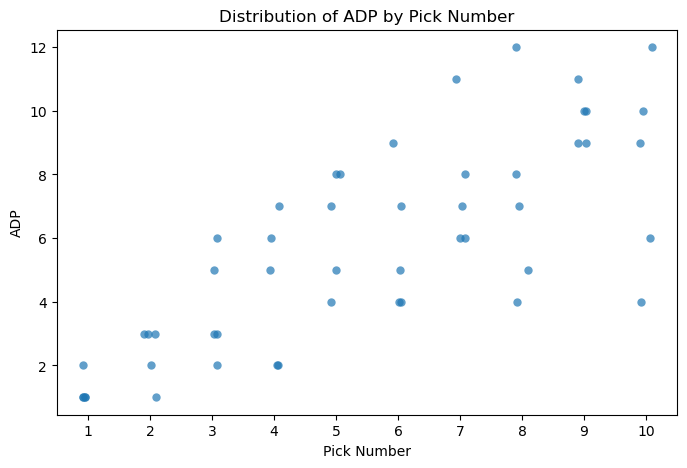

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def adp_graph_simulation(num_teams, roster_slots, fantasy_adp, agents):
    """
    Run a full draft simulation.
    
    Parameters:
      - num_teams: int, number of teams drafting
      - roster_slots: dict, roster configuration
      - fantasy_adp: DataFrame or list of players available for drafting
      - agent_classes: dict mapping team position to Agent instances
                       e.g., {1: NaiveAgent(...), 2: ReinforcementLearningAgent(...), ...}
    """

    


    draft_results = []

    # Main draft loop

    # Initialize the draft environment
    for i in range(5):
        draft = Draft(num_teams, roster_slots, fantasy_adp)
        
        done = False
        while draft.current_round <= 1:
            try:
                current_pick = draft.current_pick_position
                current_agent = agents[current_pick]

                # Let the agent pick a player given current available players and their team
                player_to_pick = current_agent.pick_player(
                    draft
                )

                # Draft the player and advance
                draft.draft_player(player_to_pick)
                draft_results.append({
                    #'round': draft.current_round,
                    #'pick_position': draft.current_pick_position,
                    #'player': player_to_pick.name,
                    #'position': player_to_pick.position,
                    'adp': player_to_pick.adp,
                    'pick_number': draft.pick_number
                })
                draft.advance_pick()

            except StopIteration:
                done = True

    
    draft_results_df = pd.DataFrame(draft_results)
    

    plt.figure(figsize=(8, 5))
    sns.stripplot(x="pick_number", y="adp", data=draft_results_df, jitter=True, size=6, alpha=0.7)
    plt.xlabel("Pick Number")
    plt.ylabel("ADP")
    plt.title("Distribution of ADP by Pick Number")
    plt.show()

adp_graph_simulation(NUM_TEAMS, ROSTER_SLOTS, fantasy_adp_24_25, {i: NaiveAgent(f"Team {i}") for i in range(1, NUM_TEAMS + 1)})
